## Part 1: Modeling Challenge

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Opening field_names.txt

In [2]:
header = open("field_names.txt", 'r').read().split('\n')
header

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

#### Opening and attaching field_names header to csv dataframe

In [3]:
df = pd.read_csv('breast-cancer.csv', names = header)

In [4]:
# Check whether header had been attached to the dataframe

df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# check whether our data has missing values
df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [6]:
# Dropping the ID column as it is unnecessary for main our objective
df = df.drop(columns='ID', axis=1)

In [7]:
df.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ?

In [8]:
# Calculate mean of smoothness and compactness

mean_smoothness = df.groupby("diagnosis")["smoothness_mean", "compactness_mean"].mean()
mean_smoothness

,smoothness_mean,compactness_mean
diagnosis,,
B,2.000321,0.021438
M,4.323929,0.032281


In [9]:
# Calculate median of smoothness and compactness

median_smoothness = df.groupby("diagnosis")["smoothness_mean", "compactness_mean"].median()
median_smoothness

,smoothness_mean,compactness_mean
diagnosis,,
B,1.8510,0.01631
M,3.6795,0.02859


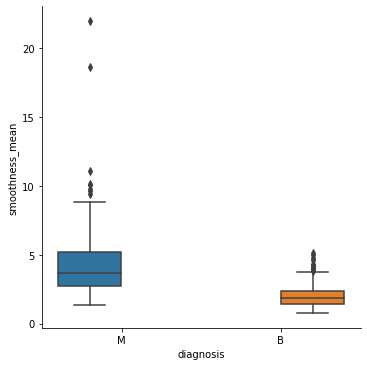

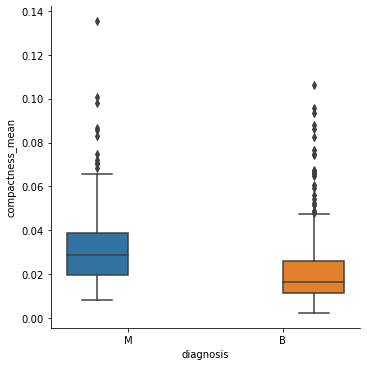

In [10]:
sns.catplot(x="diagnosis", y="smoothness_mean", hue="diagnosis", kind="box", data=df)
sns.catplot(x="diagnosis", y="compactness_mean", hue="diagnosis", kind="box", data=df)

By using boxplots, we can see how the median of smoothness and compactness are being visualised. For each box, the following pieces of information are shown:
- The central line of each box represents the median value
    - smoothness median = 1.8510 (Benign); 3.6795 (Malignant)
    - compactness median = 0.01631 (Benign); 0.02859 (Malignant)
- The top and bottom of the boxes are the $3^{rd}$ and $1^{st}$ quantile, respectively.
    - This means that 25% of all values are below the bottom line and 25% are above the top line, i.e. 50% of all values are within the colored region
- The whiskers denote the outlier limits. Any value between the whiskers is considered "normal"
- The points outside of the whiskers are outliers that may require special attention

### Exploratory Analysis

In [11]:
# Change diagnosis Benign (B) and Malignant (M) to binary 0 & 1

df.loc[df["diagnosis"]=='M', "diagnosis_type"]=1
df.loc[df["diagnosis"]=='B', "diagnosis_type"]=0

# Ensure binary 0 & 1 are integer
df = df.astype({"diagnosis_type": int})

In [12]:
#Get statistical description of our dataframe
df.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_type
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df.skew()

radius_mean                   0.942380
radius_sd_error               0.650450
radius_worst                  0.990650
texture_mean                  1.645732
texture_sd_error              0.456324
texture_worst                 1.190123
perimeter_mean                1.401180
perimeter_sd_error            1.171180
perimeter_worst               0.725609
area_mean                     1.304489
area_sd_error                 3.088612
area_worst                    1.646444
smoothness_mean               3.443615
smoothness_sd_error           5.447186
smoothness_worst              2.314450
compactness_mean              1.902221
compactness_sd_error          5.110463
compactness_worst             1.444678
concavity_mean                2.195133
concavity_sd_error            3.923969
concavity_worst               1.103115
concave_points_mean           0.498321
concave_points_sd_error       1.128164
concave_points_worst          1.859373
symmetry_mean                 0.415426
symmetry_sd_error        

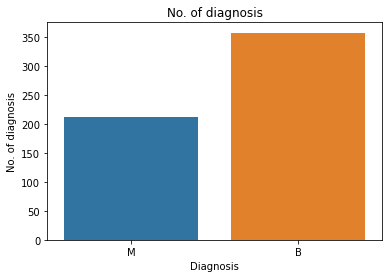

In [15]:
sns.countplot(x='diagnosis', data=df)
plt.title("No. of diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("No. of diagnosis")
plt.show()

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst',
       'diagnosis_type'],
      dtype='object')

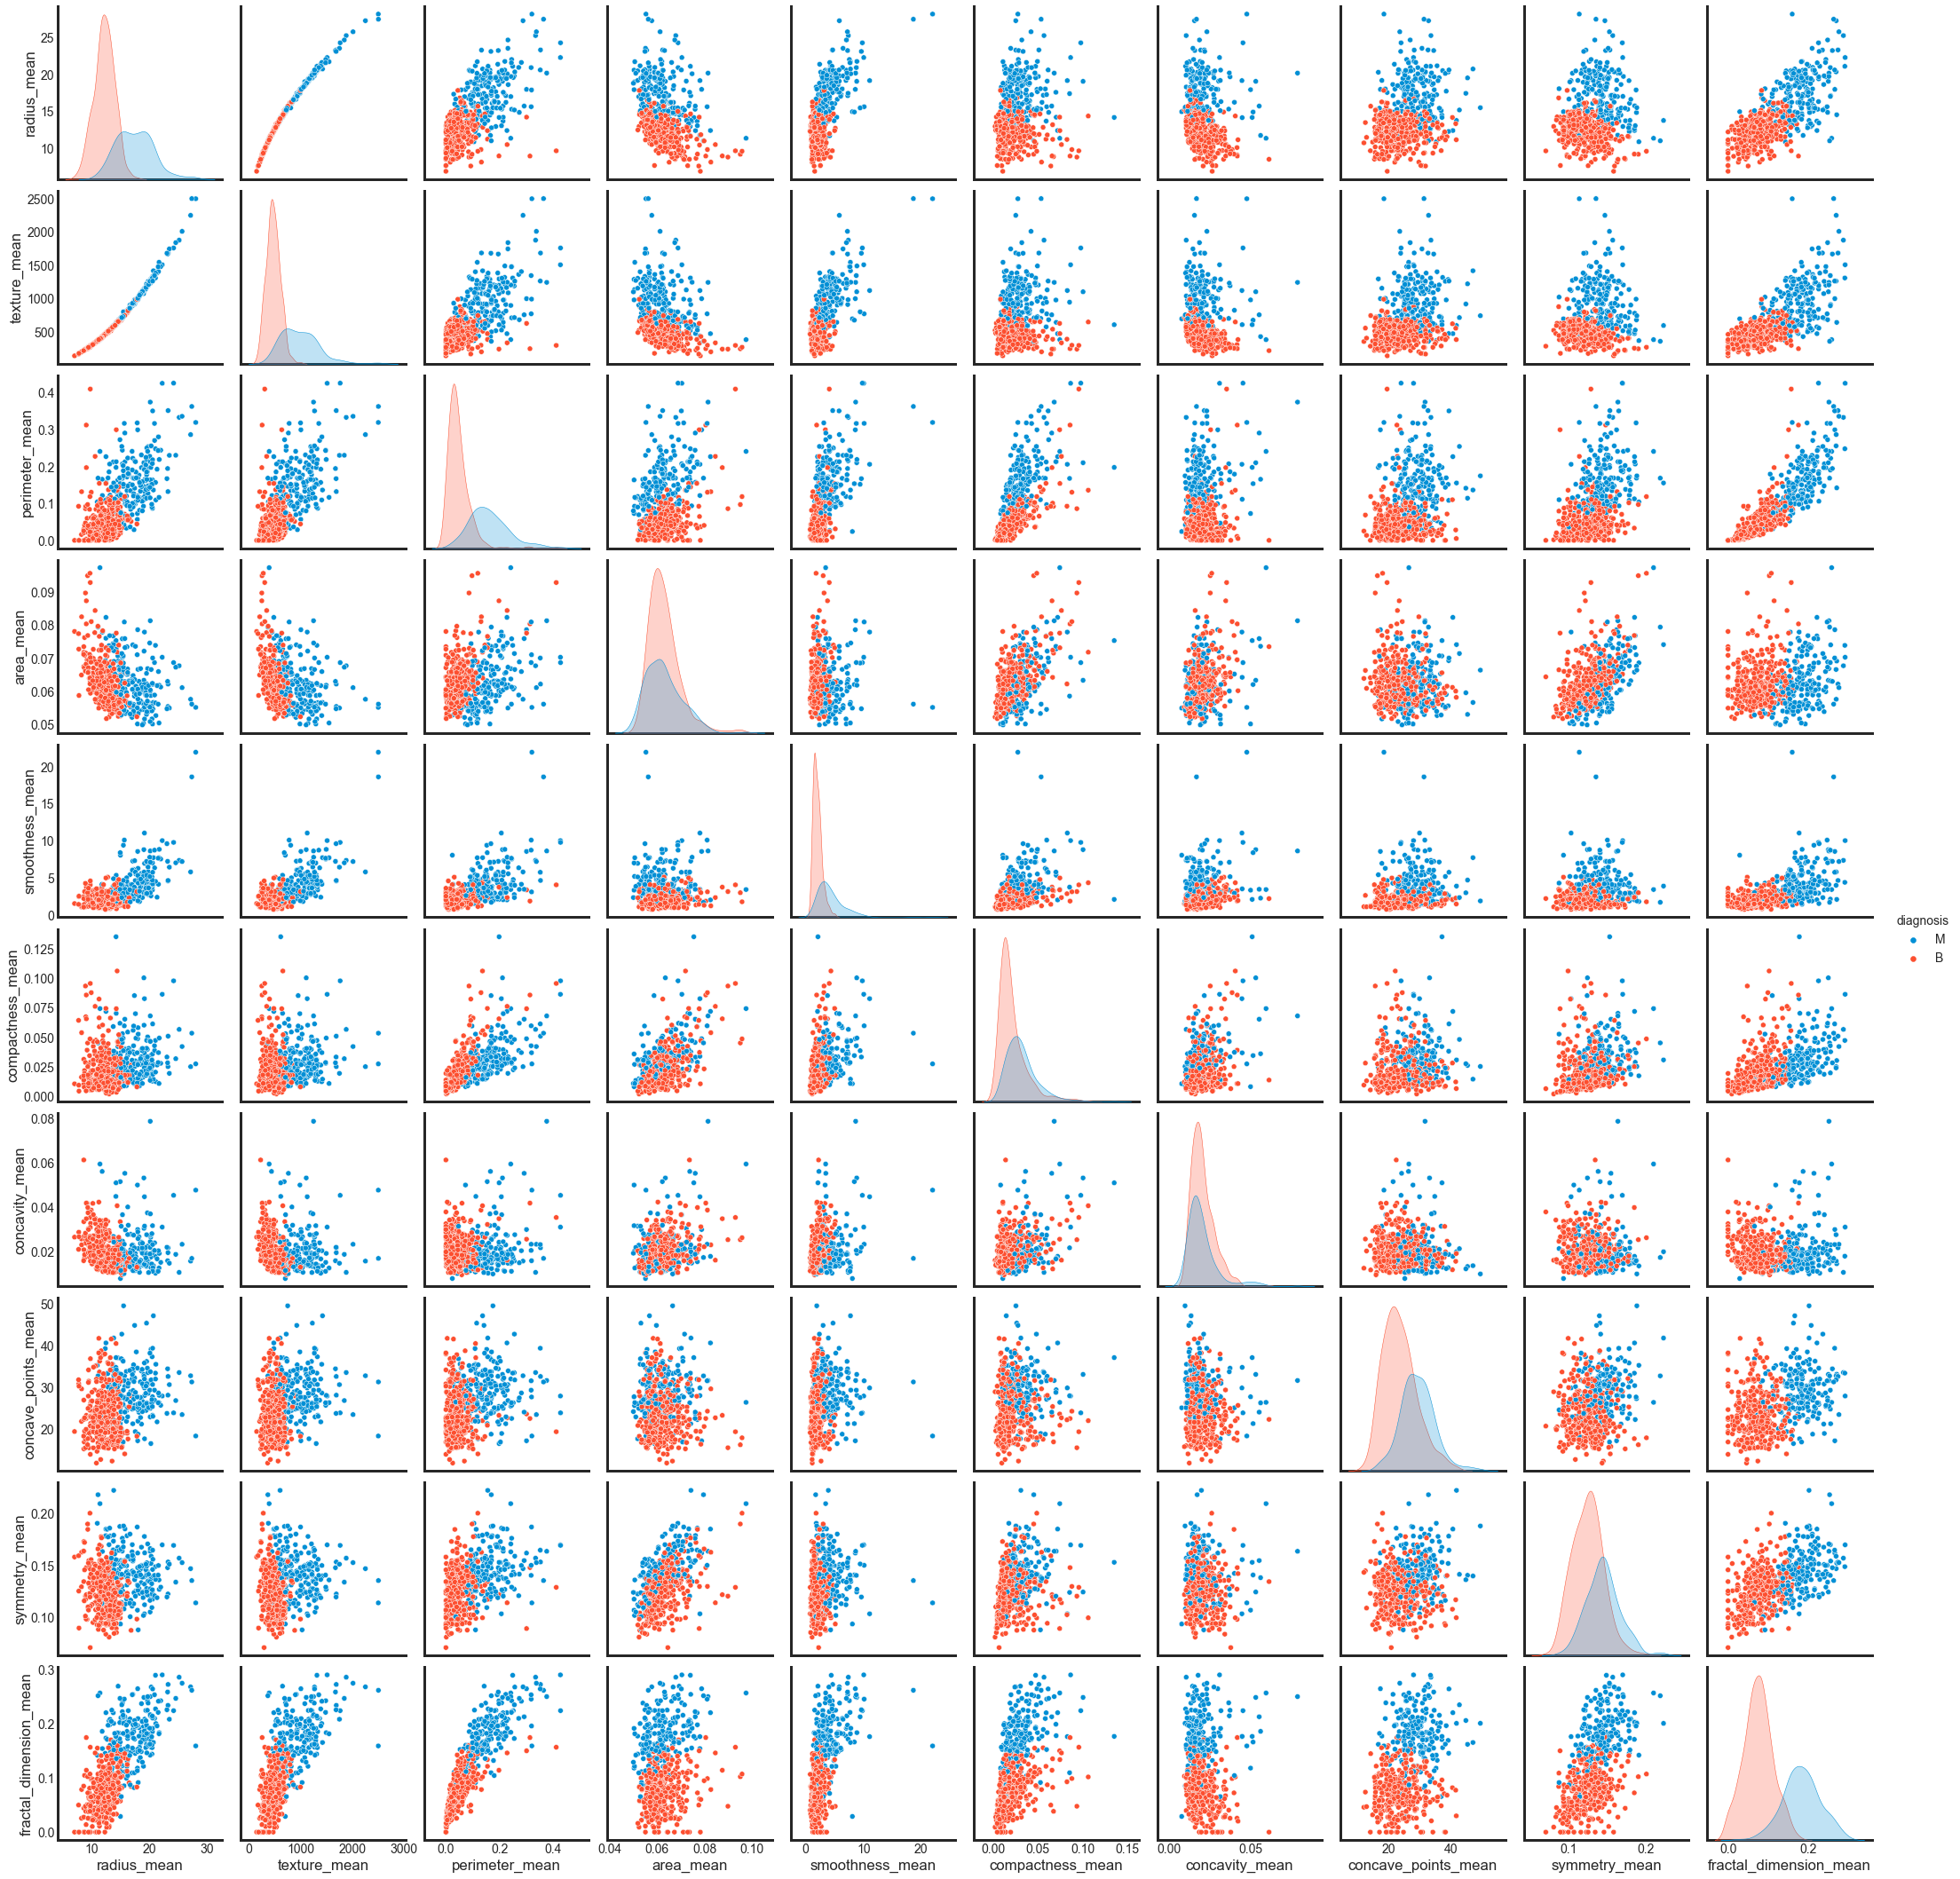

In [18]:
#Visualizing Multidimensional Relationships
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(df[[df.columns[0], df.columns[1],df.columns[4],df.columns[7],
                     df.columns[10], df.columns[13],df.columns[16], df.columns[19],df.columns[22], df.columns[25], 
                     df.columns[28]]], hue = 'diagnosis' , height=3)
plt.savefig("visual.png")

In [19]:
df.corr()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_type
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
radius_sd_error,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
radius_worst,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
texture_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
texture_sd_error,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
texture_worst,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
perimeter_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
perimeter_sd_error,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
perimeter_worst,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
area_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [20]:
# To find suitable predictive variables, we must first find the correlation between the data

corr = df[df.columns[1:]].corr(method = 'pearson')['diagnosis_type'][:-1].sort_values(ascending=False)
corr

fractal_dimension_mean        0.793566
concave_points_sd_error       0.782914
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_worst                  0.742636
concave_points_worst          0.733825
radius_mean                   0.730029
texture_mean                  0.708984
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error          0.253730
concavity_sd_error       

Chose 3 variables that are could be predictive of a malignant tumor based on the correlation coefficient above

In [25]:
predictive_features = df[['diagnosis_type', 'fractal_dimension_mean', 'radius_mean', 'texture_mean']]
predictive_features

,diagnosis_type,fractal_dimension_mean,radius_mean,texture_mean
0,1,0.2654,17.99,1001.0
1,1,0.1860,20.57,1326.0
2,1,0.2430,19.69,1203.0
3,1,0.2575,11.42,386.1
4,1,0.1625,20.29,1297.0
...,...,...,...,...
564,1,0.2216,21.56,1479.0
565,1,0.1628,20.13,1261.0
566,1,0.1418,16.60,858.1
567,1,0.2650,20.60,1265.0
